## 資料收集

In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split

df = pd.read_excel('training_data.xlsx', sheetname="Data")

x = df.iloc[:,1:31]
y = df['Y1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Using TensorFlow backend.


In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [3]:
x_train.shape

(3006, 30)

In [4]:
y_train.shape

(3006,)

In [5]:
x_test.shape

(752, 30)

In [6]:
y_test.shape

(752,)

In [7]:
%pylab inline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

clf = SVC(kernel="rbf")
clf.fit(x_train, y_train)

Populating the interactive namespace from numpy and matplotlib


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
y_pred = clf.predict(x_test)

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[114, 223],
       [ 80, 335]])

## 驗證模型

In [10]:
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

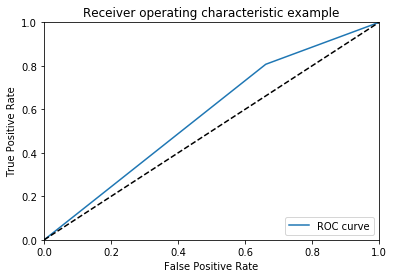

In [11]:
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()